## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import snscrape.modules.twitter as sntwitter
from textblob import TextBlob
from googletrans import Translator
import httpx

## Scrapping

In [2]:
query = "matahari department store lang:id"
tweets = []
keyword = []
limit = 100

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.id,tweet.user.username,tweet.content])
    keyword.append("matahari department store")

df = pd.DataFrame(tweets,columns=["ID","Username","Tweet"])
df["Keyword"] = keyword
df.to_excel("data_1.xlsx",index=False)

In [3]:
query = "matahari mall lang:id"
tweets = []
keyword = []
limit = 100

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.id,tweet.user.username,tweet.content])
    keyword.append("matahari mall")

df = pd.DataFrame(tweets,columns=["ID","Username","Tweet"])
df["Keyword"] = keyword
df.to_excel("data_2.xlsx",index=False)

In [4]:
query = "matahari.com lang:id"
tweets = []
keyword = []
limit = 100

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.id,tweet.user.username,tweet.content])
    keyword.append("matahari.com")

df = pd.DataFrame(tweets,columns=["ID","Username","Tweet"])
df["Keyword"] = keyword
df.to_excel("data_3.xlsx",index=False)

## Merge Data

In [15]:
df_1 = pd.read_excel("data_1.xlsx")
df_2 = pd.read_excel("data_2.xlsx")
df_3 = pd.read_excel("data_3.xlsx")

df = pd.concat([df_1,df_2,df_3])

df = df.reset_index(drop=True)

## Labelling

In [17]:
tweet = df["Tweet"].tolist()

In [18]:
tweet_en = []
timeout = httpx.Timeout(60)
translator = Translator(timeout=timeout)

for i in tweet:
    tweet_en.append(translator.translate(i,src="id",dest="en").text)

In [19]:
tweet_polarity = []
tweet_label = []

for i in tweet_en:
    analysis = TextBlob(i)
    tweet_polarity.append(analysis.sentiment.polarity)
    
    if analysis.sentiment.polarity > 0.0:
        tweet_label.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        tweet_label.append("Netral")
    else:
        tweet_label.append("Negatif")

In [20]:
positif = 0
netral = 0
negatif = 0

for i in tweet_label:
    if i == "Positif":
        positif += 1
    elif i == "Netral":
        netral += 1
    else:
        negatif += 1

In [21]:
df["Score"] = tweet_polarity
df["Label"] = tweet_label
df = df.sort_values(["Keyword","Score"],ascending=False).reset_index(drop=True)
df.to_excel("Scrapped Data.xlsx",index=False)

# Results

In [22]:
print("Hasil Sentimen")
print(f"Positif\t: {positif}\t({round(positif/len(tweet_en)*100,2)}%)")
print(f"Netral\t: {netral}\t({round(netral/len(tweet_en)*100,2)}%)")
print(f"Negatif\t: {negatif}\t({round(negatif/len(tweet_en)*100,2)}%)")

Hasil Sentimen
Positif	: 103	(34.33%)
Netral	: 174	(58.0%)
Negatif	: 23	(7.67%)


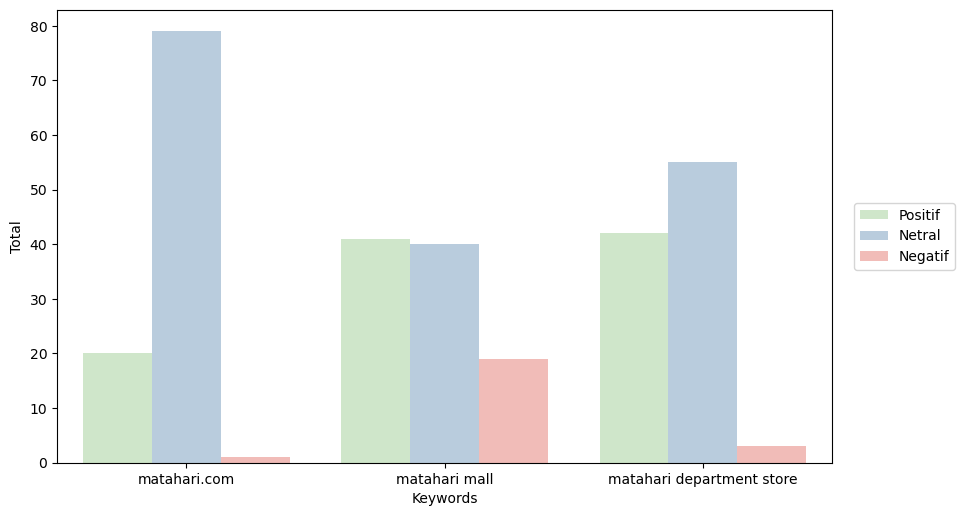

In [23]:
palette = ["#ccebc5","#b3cde3","#fbb4ae"]
sns.set_palette(palette)

plt.figure(figsize=(10,6),dpi=100)
sns.countplot(data=df,x="Keyword",hue="Label",palette=palette)
plt.xlabel("Keywords")
plt.ylabel("Total")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()